# Load Libraries

In [311]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick

# Data Loading
import os

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Load Dataset

In [207]:
os.chdir('C:/04-AIML/05 Ensemble Technique')
df_churn1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df_churn2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

# Explore shape and size of each datasets.

In [208]:
# Shape of the each datasets
df_churn1.shape
df_churn2.shape
print("Churn1 Shape is :",df_churn1.shape)
print("Churn2 Shape is :", df_churn2.shape)

Churn1 Shape is : (7043, 10)
Churn2 Shape is : (7043, 11)


In [209]:
# Size of the each datasets
df_churn1.size
df_churn2.size
print("Churn1 Size is :",df_churn1.size)
print("Churn2 Size is :",df_churn2.size)

Churn1 Size is : 70430
Churn2 Size is : 77473


# Merge

In [210]:
# Merge two dataframes into one
df = pd.concat([df_churn1,df_churn2],axis=1)

# Storing the merged output file in a folder
df.to_csv('C:/04-AIML/05 Ensemble Technique/console.csv',index=False)

In [211]:
# Shape of the each datasets
df.shape
print("Merged Dataset Shape is :",df.shape)

Merged Dataset Shape is : (7043, 21)


# Check for Datatypes

In [212]:
# Checking for Datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Check for Blank Rows

In [213]:
# Check for Blank Rows
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
555.4       1
95.65       1
5450.7      1
6224.8      1
1785.65     1
Name: TotalCharges, Length: 6531, dtype: int64

Identified there are 11 rows which is blank in 'TotalCharges' Field

In [ ]:
# Converting Total Charges Field to Float
df["TotalCharges"] = df['TotalCharges'].str.replace(' ', 'Nan').astype(float) 

In [215]:
# Checking the datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Check for Missing Value

In [216]:
# Check Missing Value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [217]:
# Header Info
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
df=df.dropna() # Dropping Null Values
df=df.drop(['customerID'],axis=1) # Dropping CustomerID Columes, since it does not add any values for the model

In [219]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [220]:
# After Dropping , Checking the updated dataset shape
df.shape

(7032, 20)

# Label Encoding

In [221]:
#Label Encoding
le= LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'].astype(str))
df['gender'] = le.fit_transform(df['gender'].astype(str))
df['Partner'] = le.fit_transform(df['Partner'].astype(str))
df['Dependents'] = le.fit_transform(df['Dependents'].astype(str))
df['MultipleLines'] = le.fit_transform(df['MultipleLines'].astype(str))
df['InternetService'] = le.fit_transform(df['InternetService'].astype(str))
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'].astype(str))
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'].astype(str))
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'].astype(str))
df['TechSupport'] = le.fit_transform(df['TechSupport'].astype(str))
df['TechSupport'] = le.fit_transform(df['TechSupport'].astype(str))
df['StreamingTV'] = le.fit_transform(df['StreamingTV'].astype(str))
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'].astype(str))
df['Contract'] = le.fit_transform(df['Contract'].astype(str))
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'].astype(str))
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'].astype(str))

In [222]:
df['PhoneService'] = df['PhoneService'].replace(['No'],0)
df['PhoneService'] = df['PhoneService'].replace(['Yes'],1)

In [223]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Check for datatypes after conversion from Categorical to Numerical

In [224]:
# Checking datatypes after conversion.
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int64
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

From the above all the categorical variables are converted to numerical 

# Churn Rate

In [225]:
# Value Counts of Churn
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [226]:
# Percentage of Churn
df['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

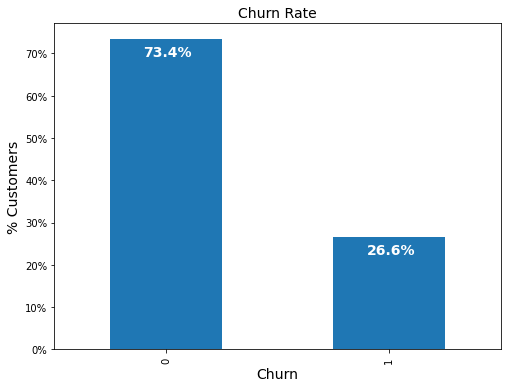

In [227]:
ax = (df['Churn'].value_counts()*100.0 /len(df.gender)).plot(kind='bar',stacked = True,
                                                                        
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

# Exploratory Data Analysis

In [228]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


In [229]:
#Correlation Matrix
cor =df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


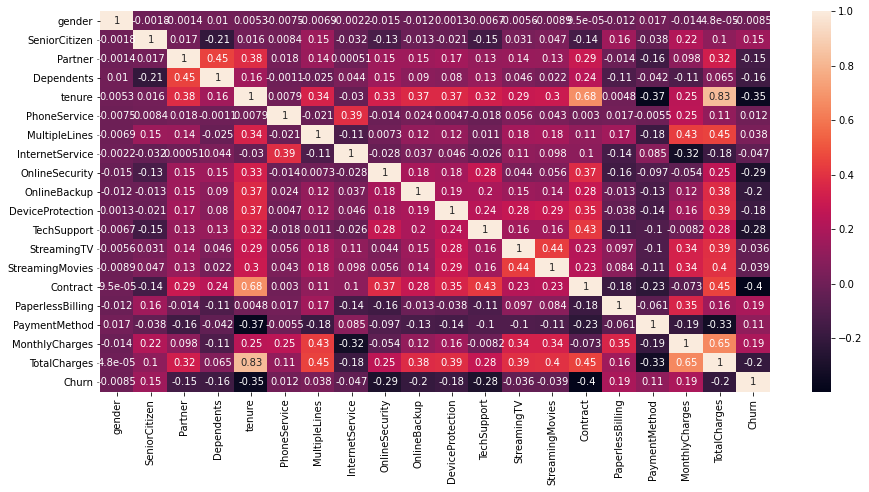

In [230]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(cor, annot=True,  ax=ax)
plt.show()

<AxesSubplot:>

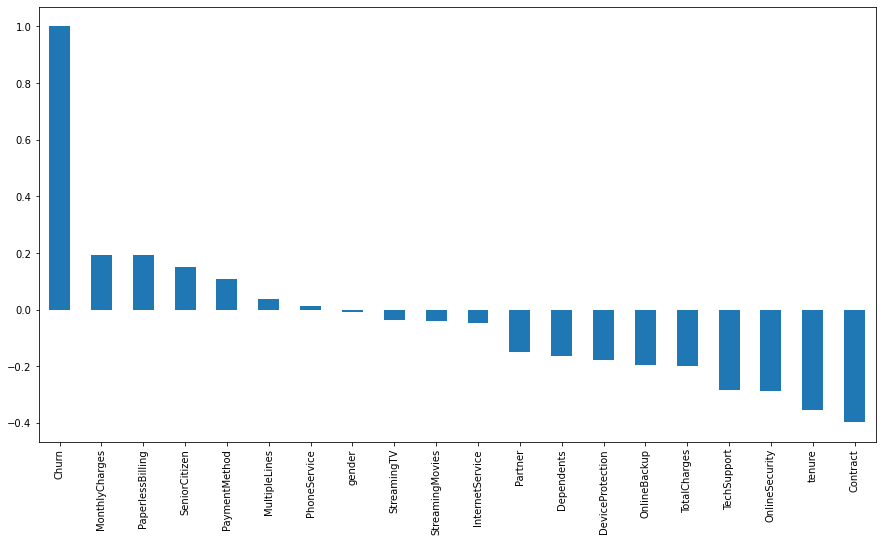

In [231]:
#Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Positive Correlation to Churn 
1. Monthly Charges

2. PaperlessBilling

3. SeniorCitizen

4. Payment Method


Negative Correlation to Churn 
1. Contract

2. Tenure

3. OnlineSecurity

4. TechSupport


# Data Exploration - Gender Distribution

In [232]:
df['gender'].value_counts()

1    3549
0    3483
Name: gender, dtype: int64

In [233]:
df['gender'].value_counts(normalize=True)

1    0.504693
0    0.495307
Name: gender, dtype: float64

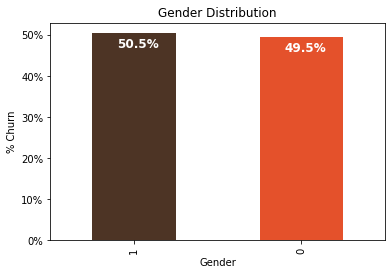

In [234]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0/len(df.gender)).plot(kind='bar',
stacked = True,color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Churn')
ax.set_xlabel('Gender')
ax.set_ylabel('% Churn')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


Gender Distribution - Almost 50 % of our customers are male and 50 % of our customers are female

# Data Exploration - Senior Citizen

In [235]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [236]:
df['SeniorCitizen'].value_counts(normalize=True)

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

Text(0.5, 1.0, '% of Senior Citizens')

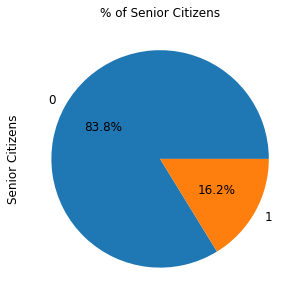

In [237]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df.gender))\
.plot.pie(autopct='%.1f%%', labels = ['0', '1'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

There are only 16% of the customers who are senior citizens

# Churn by Senior Citizen

In [238]:
pd1=df.groupby(['SeniorCitizen','Churn']).size().unstack()
pd1

Churn,0,1
SeniorCitizen,,
0,4497,1393
1,666,476


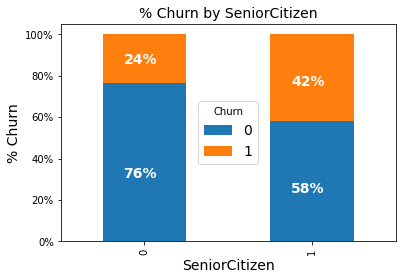

In [239]:
pd = df.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (pd.T*100.0 / pd.T.sum()).T.plot(kind='bar',stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn',fontsize =14)
ax.set_ylabel('% Churn',size = 14)
ax.set_title('% Churn by SeniorCitizen',size = 14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Senior Citizen Churn Rate is at 42 % in comparision to 24% of non-senior citizen. This indicates that Senior Citizen Churn Rate is closer to double than the non-senior Citizen

# Data Exploration - Partner and Dependent 

In [240]:
# Value Counts- Partner and Dependent
Partner=df['Partner'].value_counts()
Dependents=df['Dependents'].value_counts()
print(' Partner =',Partner)
print(' Dependents=',Dependents)

 Partner = 0    3639
1    3393
Name: Partner, dtype: int64
 Dependents= 0    4933
1    2099
Name: Dependents, dtype: int64


In [241]:
# Percentage - Partner and Dependents
Partner=df['Partner'].value_counts(normalize=True)
Dependents=df['Dependents'].value_counts(normalize=True)
print(' Partner =',Partner)
print(' Dependents=',Dependents)

 Partner = 0    0.517491
1    0.482509
Name: Partner, dtype: float64
 Dependents= 0    0.701507
1    0.298493
Name: Dependents, dtype: float64


From the above, 48 % of our customers have partners and 30 % of our customers have Dependents

In [308]:
pd = df.groupby(['Partner','Dependents']).size().unstack()
pd

Dependents,0,1
Partner,,
0,3280,359
1,1653,1740


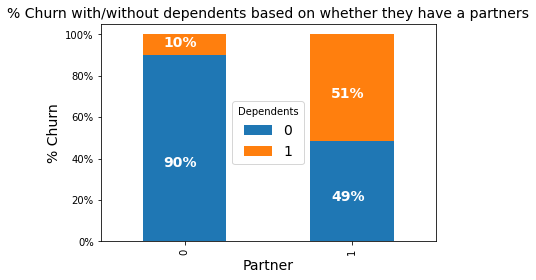

In [245]:
pd = df.groupby(['Partner','Dependents']).size().unstack()
ax = (pd.T*100.0 / pd.T.sum()).T.plot(kind='bar',stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Churn',size = 14)
ax.set_title('% Churn with/without dependents based on whether they have a partners',size = 14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

1. 51% of our customer will have the Partner and Dependents

2. 49 % of our customer will have partner but not the dependent


# Data Exploration - Tenure and Contract

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


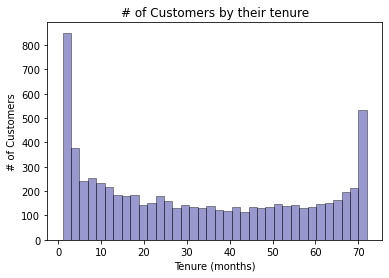

In [246]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure');

From the above Histogram 

1. Most of the tenure of the customers have been with just for a month

2. Many of the customers are there about 70 months

To retain the customers it is evident from the above that the customers should be offered 
a better benefits  who converts from monthly tenure to the 70 months tenure

In [247]:
# Value counts for Contract
df['Contract'].value_counts()

0    3875
2    1685
1    1472
Name: Contract, dtype: int64

In [248]:
# Percentage for Contract
df['Contract'].value_counts(normalize=True)

0    0.551052
2    0.239619
1    0.209329
Name: Contract, dtype: float64

Text(0.5, 1.0, '# of Churn by Contract Type')

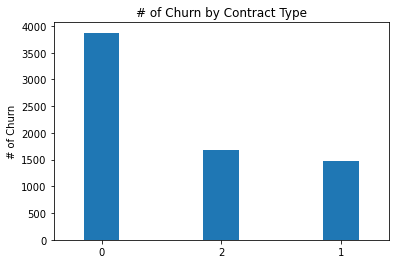

In [249]:
# of Churn by Contract type
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Churn')
ax.set_title('# of Churn by Contract Type')

From the above graph, 

 1.3875 (55%) of the customers are in month on month contract

`2.1695 (24% ) of the customers are Two Year contract

`3. 1473 (21% ) of the customers are in One Year contract

With One Year to Two Year Contract  Customer seems to be Loyal 


In [ ]:
# Relationship between Monthly Charges and Total Charges

sns.jointplot(df['MonthlyCharges'],df['TotalCharges']);

From the above graph, there is a strong correlation between Monthly Charges and TotalCharges . 
As Monthly Charges increases Total Charges also increases

Customers who do not churn within less tenure, they tend to stay for a longer tenure 

# Monthly Charges

Text(0.5, 0, 'Monthly Charges')

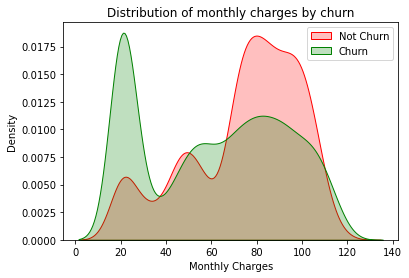

In [251]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"]==1)] ,color="Red",shade=True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"]==0)] ,color="Green",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_title('Distribution of monthly charges by churn')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')

# Total Charges

Text(0.5, 0, 'Total Charges')

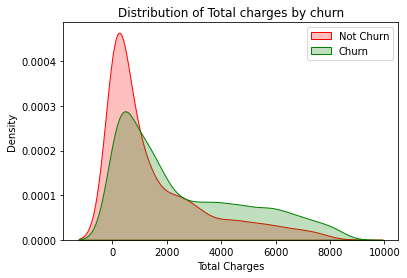

In [252]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]==1)] ,color="Red",shade=True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]==0)] ,color="Green",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_title('Distribution of Total charges by churn')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')

# Outlier Detection

<AxesSubplot:>

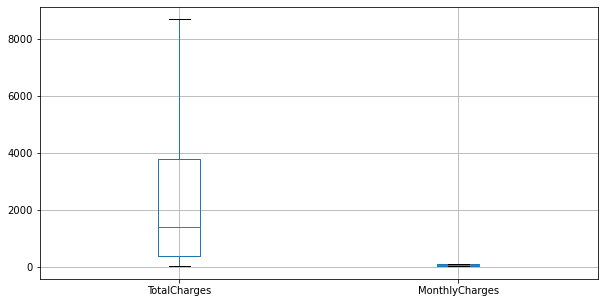

In [339]:
df.boxplot(column = [ 'TotalCharges', 'MonthlyCharges'], figsize = (10,5))

In [340]:
#Check number of outliers greater than upper fence and determining Lower Fence

out=[]
def iqr_outliers(df_final):
    q1 = df_final.quantile(0.25)
    q3 = df_final.quantile(0.75)
    iqr = q3-q1
    Lower_fence = q1 - 1.5 * iqr
    Upper_fence = q3 + 1.5 * iqr
    for i in df_final:
         if i > Upper_fence :
                 out.append(i)
    print("Outliers:",out)
    
    print('Lower Fence is', Lower_fence)
    print('Upper Fence is', Upper_fence)

In [342]:
iqr_outliers(df['MonthlyCharges'])

Outliers: []
Lower Fence is -45.824999999999996
Upper Fence is 171.27499999999998


In [343]:
iqr_outliers(df['TotalCharges'])

Outliers: []
Lower Fence is -4688.481250000001
Upper Fence is 8884.66875


In [345]:
# Drop the values that are greater than upper fence.
df=df[df['MonthlyCharges']<171.2] 
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Services Used by Customers

In [346]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [347]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

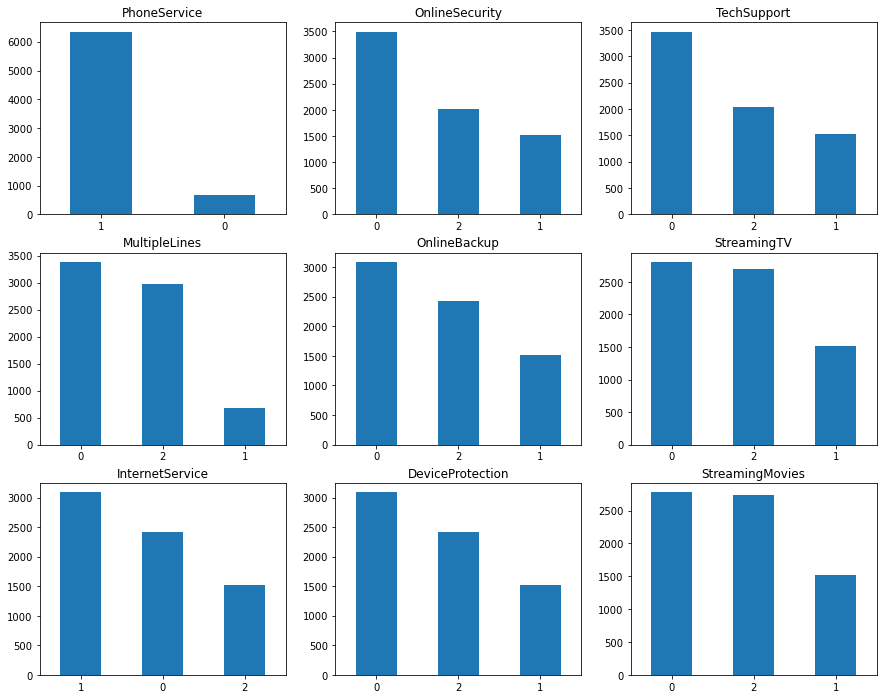

In [348]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

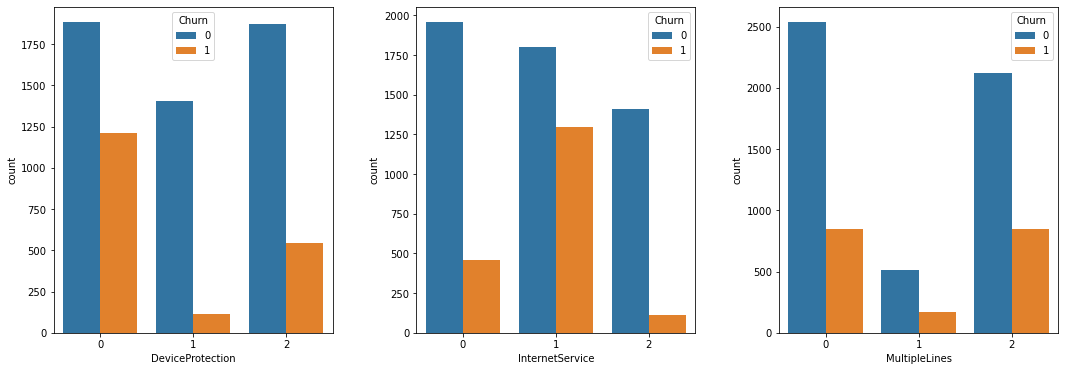

In [349]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "DeviceProtection", hue="Churn", data = df, ax= ax[0])
sns.countplot(x = "InternetService", hue="Churn", data = df, ax = ax[1])
sns.countplot(x = "MultipleLines", hue="Churn", data = df, ax = ax[2])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

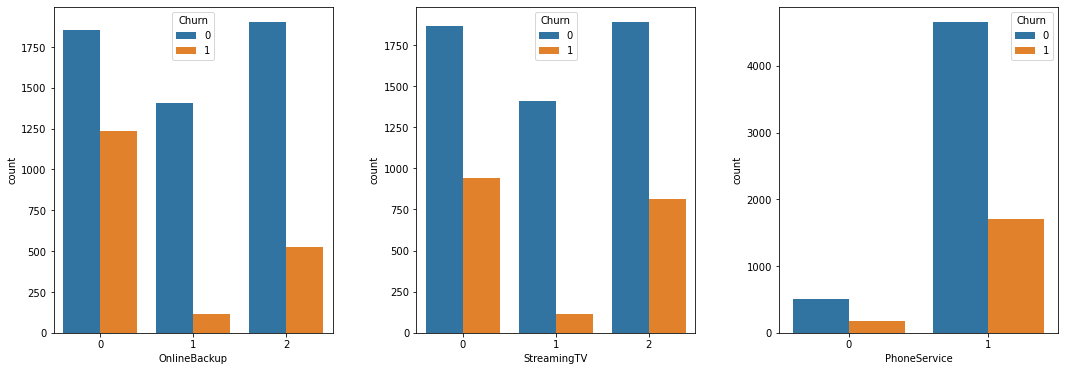

In [350]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "OnlineBackup", hue="Churn", data = df, ax = ax[0])
sns.countplot(x = "StreamingTV", hue="Churn", data = df, ax = ax[1])
sns.countplot(x = "PhoneService", hue="Churn", data = df, ax = ax[2])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

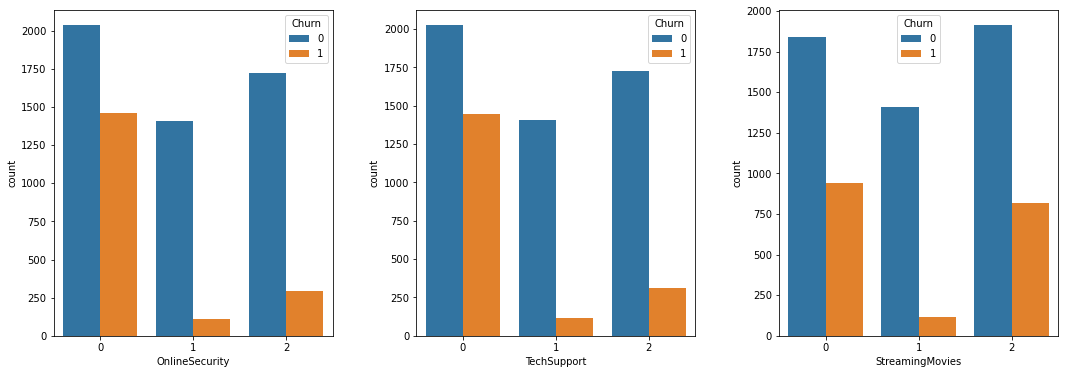

In [351]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "OnlineSecurity", hue="Churn", data = df, ax = ax[0])
sns.countplot(x = "TechSupport", hue="Churn", data = df, ax = ax[1])
sns.countplot(x = "StreamingMovies", hue="Churn", data = df, ax = ax[2])

# Segregate Predictors vs Target attributes

In [352]:
#Segregate predictors vs target attributes
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

In [353]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# Scaling

In [354]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Train Test Split

In [355]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [356]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [357]:
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (4922, 19)
y_train shape:  (4922,)
x_test shape:  (2110, 19)
y_test shape:  (2110,)


# SMOTE

In [358]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

from collections import Counter
print("Before Smote :",Counter(y_train))
print("After Smote :",Counter(y_train_res))

After OverSampling, the shape of train_x: (7166, 19)
After OverSampling, the shape of train_y: (7166,) 

Before Smote : Counter({0: 3583, 1: 1339})
After Smote : Counter({1: 3583, 0: 3583})


In [359]:
# split imbalanced dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


After Comparing the test and train through stratification , there is no difference.

# Logisitic Regression

In [395]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0])

In [396]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 1.0000


In [397]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

In [398]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 1.0000
Test-set accuracy score: 1.0000


In [399]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [400]:
mat_train = confusion_matrix(y_train,y_train)
print("confusion matrix_train_data = \n",mat_train)

confusion matrix_train_data = 
 [[34  0]
 [ 0 36]]


Confusion Matrix


<AxesSubplot:>

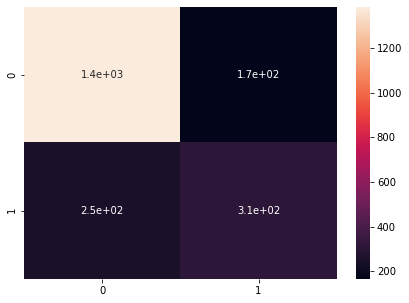

In [366]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)

In [367]:
# Print the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1383  166]
 [ 249  312]]

True Positives(TP) =  1383

True Negatives(TN) =  312

False Positives(FP) =  166

False Negatives(FN) =  249


# Grid Search

In [368]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
#logreg_cv.fit(X_train,y_train)
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

score 0.8033175355450237


# Decision tree

In [369]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion='entropy')

model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [370]:
model_entropy.score(X_train, y_train)  # performance on train data

0.9973587972368956

In [371]:
model_entropy.score(X_test, y_test)  # performance on test data

0.7251184834123223

There is a high degree of overfitting in the model due to which the test accuracy drops drastically

# Prune the decision tree 

In [372]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [373]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [374]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.7781990521327015
0.7860625761885413


In [375]:
acc_DT = accuracy_score(y_test, preds_pruned)

# Random Forest

In [376]:
# instantiate the classifier with n_estimators = 1000

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 1000)
rfcl = rfcl.fit(X_train, y_train)

In [377]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

0.790521327014218


# AdaBoost

In [378]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7971563981042654

# XG Boost

In [379]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

C:\Users\srikanthve\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7829383886255924

# Gradient Boost

In [380]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [381]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
print(acc_GB)

0.8009478672985783


# Bagging

In [382]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=1000, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [383]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
print(acc_BG)

0.7924170616113744


# Store the accuracy results

In [384]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.778199
0,Gradient Boost,0.800948
0,Bagging,0.792417
0,Random Forest,0.790521


# Support Vector Machine (SVM)

In [385]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7981042654028436


In [386]:
# example of scaling the dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from pickle import dump


In [387]:
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=10)


In [388]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


# Pickle the model

In [389]:
# Import pickle Package

import pickle

In [390]:
# Define the Model
LR_Model = LogisticRegression(C=0.1,  
                               max_iter=20, 
                               fit_intercept=True, 
                               n_jobs=3, 
                               solver='liblinear')

# Train the Model
LR_Model.fit(X_train, y_train)  


C:\Users\srikanthve\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(C=0.1, max_iter=20, n_jobs=3, solver='liblinear')

In [391]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)

In [392]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=0.1, max_iter=20, n_jobs=3, solver='liblinear')

In [394]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

Test score: 100.00 %


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0])

# Conclusion and Improvisation

From the above 2 models , 

Logistic Regression & ADA Boosting is the best model 

Both above models accurancy is at 100% & 81% respectively. 


As an improvement measure need to increase the sample size of the datasets and to conduct the model hypertuning towards dimensionality reduction. Since the accuracy is higher need to conduct the pilot test of prediction

Need to also create the user interface where the user can able to run the model and based on the model output can compare the same with the actuals

quality - Improve the quality of the data through ensuring the zero missing data and establishing the critical data capturing

quantity - Increase the sample size which is aligned to the near population

variety - Identify of key factors through the data structuring and stratification/segmentation

velocity- Need to re-define data quality metrics so that they are relevant as well as feasible in the real-time context.

veracity- Data source and the data use should be properly aligned